### Using Tensorflow/Keras I will build a model to predict whether or not a patient has Pneumonia based on their chest X-Ray

In [1]:
import os

In [2]:
import tensorflow as tf
import keras
print(os.listdir("../xray"))

import pandas as pd
import numpy as np

# Import various componenets for model building
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop

import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

# Import the backend
from keras import backend as K

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

Using TensorFlow backend.


['TensorChallenge.ipynb', '.DS_Store', 'chest-xray-pneumonia.zip', 'chest_xray', '.ipynb_checkpoints']


In [3]:
#lets make sure we are reading the right files

p_data = os.listdir('../xray/chest_xray/train/PNEUMONIA')
print(p_data[:10]) #the output we get are the .jpeg files

n_data = os.listdir('../xray/chest_xray/train/NORMAL')
print('\n')
print(n_data[:10])

['person63_bacteria_306.jpeg', 'person1438_bacteria_3721.jpeg', 'person755_bacteria_2659.jpeg', 'person478_virus_975.jpeg', 'person661_bacteria_2553.jpeg', 'person276_bacteria_1296.jpeg', 'person1214_bacteria_3166.jpeg', 'person1353_virus_2333.jpeg', 'person26_bacteria_122.jpeg', 'person124_virus_238.jpeg']


['NORMAL2-IM-0927-0001.jpeg', 'NORMAL2-IM-1056-0001.jpeg', 'IM-0427-0001.jpeg', 'NORMAL2-IM-1260-0001.jpeg', 'IM-0656-0001-0001.jpeg', 'IM-0561-0001.jpeg', 'NORMAL2-IM-1110-0001.jpeg', 'IM-0757-0001.jpeg', 'NORMAL2-IM-1326-0001.jpeg', 'NORMAL2-IM-0736-0001.jpeg']


### Observe our Pneumonia X-Rays

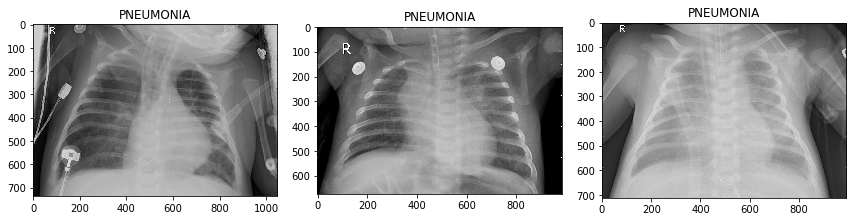

In [4]:
plt.figure(figsize = (12,12)) #sizing

for i in range(3): #show 3 photos
    plt.subplot(1, 3, i+1) #1-3(range) 
    image = cv2.imread('../xray/chest_xray/train/PNEUMONIA/' + p_data[i]) #cv2 to read image
    plt.imshow(image) #plot
    plt.title('PNEUMONIA')
    plt.tight_layout()
plt.show()

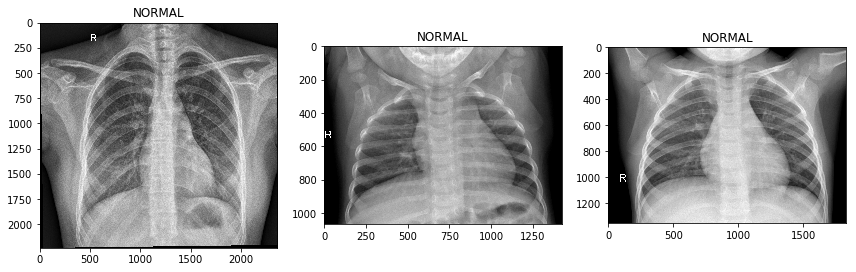

In [5]:
#And for normal X-Rays
plt.figure(figsize = (12,12)) #sizing

for i in range(3): #show 3 photos
    plt.subplot(1, 3, i+1) #1-3(range) 
    image = cv2.imread('../xray/chest_xray/train/NORMAL/' + n_data[i]) #cv2 to read image
    plt.imshow(image) #plot
    plt.title('NORMAL')
    plt.tight_layout()
plt.show()

### We can see the differences here

Now that we know the diffrence let's classify these data

'1' = Pneumonia

'0' = Normal

In [6]:
#We've been reading these images from 2 different folders. Let's group them together as well
#as give it a binary classification.

data = []
labels = []

#Setting p data to '1'
for image in p_data:
    try:
        img_read = plt.imread('../xray/chest_xray/train/PNEUMONIA/' + image) #read images
        img_resize = cv2.resize(img_read, (120, 120)) #resize 50x50 all the same shape
        img_array = img_to_array(img_resize) #convert into arrays
        data.append(img_resize) 
        labels.append(1) #add label
    except:
        None

#Setting our normal data to '0'
for image in n_data:
    try:
        img_read = plt.imread('../xray/chest_xray/train/NORMAL/' + image)
        img_resize = cv2.resize(img_read, (120, 120))
        img_array = img_to_array(img_resize)
        data.append(img_resize)
        labels.append(0) #add our label
    except:
        None

In [8]:
data2=np.delete(data,2)


ValueError: could not broadcast input array from shape (120,120,3) into shape (120,120)

In [7]:
#Convert to arrays instead of lists
labels = np.array(labels)
image_data = np.asarray(data)


ValueError: could not broadcast input array from shape (120,120,3) into shape (120,120)